## Name : Fawzi Abdelnaby Elsayed
## Group : one (Mansoura)
## Analyze different regression models on an Actual weather dataset using the various regression metrics 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RepeatedKFold


In [2]:
weather_df = pd.read_csv("weatherHistory.csv")

In [3]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
weather_df.isna().sum() 

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [7]:
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


## find categorical columns

In [8]:
category_features = [feature for feature in weather_df.columns if weather_df[feature].dtype == "object"]
category_features

['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']

In [9]:
# Function to parse year out of a string
def year(sample):
    return sample.split("-")[0]

In [10]:
# Applying function to Formatted Date column and storing results in another column
weather_df["Year"] = weather_df["Formatted Date"].apply(lambda x: year(x))

In [11]:
weather_df["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [12]:
weather_df["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [13]:
weather_df["Daily Summary"].nunique()

214

In [14]:
weather_df["Daily Summary"].value_counts()

Mostly cloudy throughout the day.                                                                  20085
Partly cloudy throughout the day.                                                                   9981
Partly cloudy until night.                                                                          6169
Partly cloudy starting in the morning.                                                              5184
Foggy in the morning.                                                                               4201
                                                                                                   ...  
Mostly cloudy until night and breezy starting in the morning continuing until afternoon.              24
Mostly cloudy starting in the morning and breezy overnight.                                           24
Partly cloudy starting overnight and breezy starting in the morning continuing until afternoon.       24
Rain until morning.                                    

## Daily Summary contains too much values, so we would just drop this feature



In [15]:
weather_df.drop("Daily Summary", axis=1, inplace=True)

## Precip Type is missing about 517 values , we will fill the missing values with the most occuring value

In [16]:
from sklearn.impute import SimpleImputer 
# Initializing Imputer and setting most frequent as strategy
imputer = SimpleImputer(strategy="most_frequent")
# finding mode value and filling missing data with mode
weather_df["Precip Type"] = imputer.fit_transform(weather_df[["Precip Type"]])

In [17]:
weather_df.isna().sum() 

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Year                        0
dtype: int64

In [18]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006


In [19]:
weather_df["Year"] = weather_df["Year"].astype("int64")

In [20]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Year                      96453 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 8.8+ MB


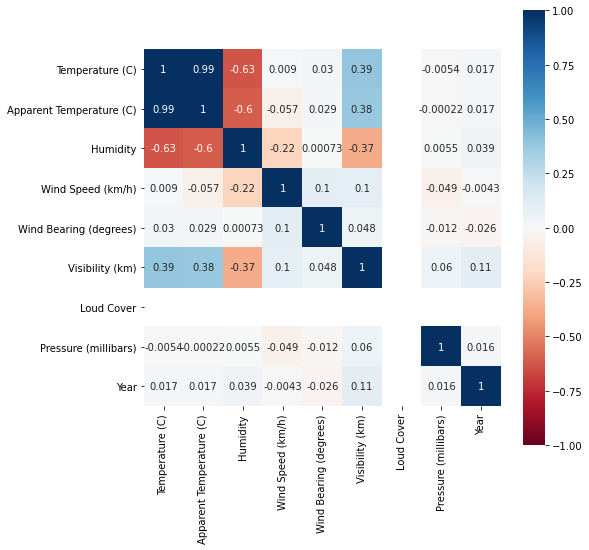

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(weather_df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='RdBu',
            annot=True, 
            square=True);

### We are spliting the data based on year recorded, so we would give the training data all the samples before the year 2016 and the test data would contain data only from 2016

 

In [22]:
train_df = weather_df[weather_df["Year"] < 2016]
test_df = weather_df[weather_df["Year"] == 2016]

In [23]:
train_df.drop(["Formatted Date", "Summary", "Precip Type", "Loud Cover","Year"], axis=1, inplace=True)
test_df.drop(["Formatted Date", "Summary", "Precip Type", "Loud Cover","Year"], axis=1, inplace=True)

C:\Users\FreeComp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
X_train = train_df.drop("Apparent Temperature (C)", axis=1)
y_train = train_df["Apparent Temperature (C)"]


In [25]:
X_test = test_df.drop("Apparent Temperature (C)", axis=1)
y_test = test_df["Apparent Temperature (C)"]

# Apply LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Storring Coefficients to Dataframe
coefficient = pd.DataFrame({
    "Coef": model.coef_},index = X_train.columns)


In [27]:
predictions = model.predict(X_test)
n=np.size(predictions)
print(n)

8784


In [28]:
# Storing Targets and predictions to compare values
compare_df = pd.DataFrame({
    "Target" : y_test,
    "Prediction" : predictions
})

In [29]:
compare_df.sample(10)

,Target,Prediction
90961,-5.900000,-5.741775
92002,24.972222,23.557337
89855,-3.055556,-2.085779
94607,-1.005556,-0.195865
91382,31.422222,33.668920
88248,8.322222,8.485795
89420,-1.205556,-0.376510
89830,-2.550000,-1.615798
91184,-13.555556,-11.336307
94161,21.138889,20.361375


In [30]:
# Importing Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"The RMSE of our model is {rmse:.4f}")

The RMSE of our model is 0.9749


In [32]:
# R2 Score
print(f"The r2 score of our model is {r2_score(y_test, predictions)} %")

The r2 score of our model is 0.9909219668110653 %


C:\Users\FreeComp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Apparent Temperature (C)'>

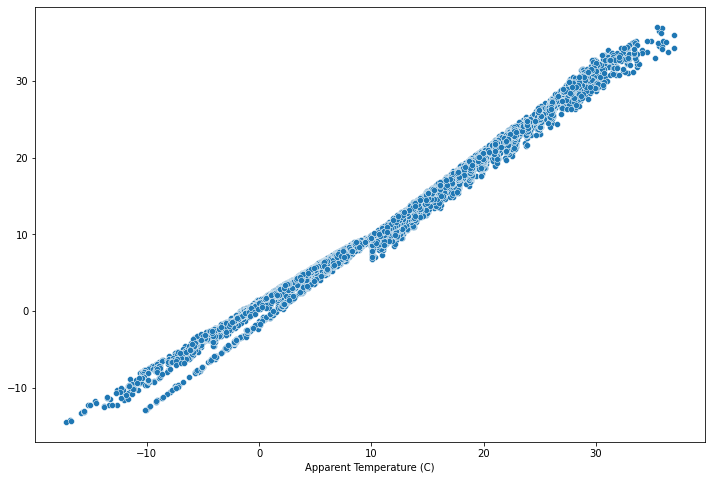

In [33]:
plt.figure(figsize=[12,8])
sns.scatterplot(y_test, predictions)

###########################################################################################################################

# Polynomial regression

In [34]:
 #Fitting the Polynomial regression to the dataset  
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree=2)  
X_poly= poly_regs.fit_transform(X_train)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(X_poly, y_train)  

LinearRegression()

In [35]:

predictions=lin_reg_2.predict(poly_regs.fit_transform(X_test))

n = np.size(predictions)
print(n)

8784


In [36]:
# Storing Targets and predictions to compare values
compare_df = pd.DataFrame({
    "Target" : y_test,
    "Prediction" : predictions
})

In [37]:
compare_df.sample(10)

,Target,Prediction
96155,20.088889,19.938287
91282,-4.077778,-3.708704
94618,4.866667,5.413259
91506,16.644444,16.892219
90297,1.805556,2.304061
95992,17.688889,17.459255
90386,4.938889,5.484564
94018,28.111111,28.976006
92183,15.905556,15.876158
89171,1.455556,1.994178


In [38]:
# Importing Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"The RMSE of our model is {rmse:.9f}")

The RMSE of our model is 0.613885661


In [40]:
# R2 Score
print(f"The r2 score of our model is {r2_score(y_test, predictions)} %")

The r2 score of our model is 0.9964002953376256 %


### when increase the degree of polynomial then  we can get more accurate results by increasing the degree of Polynomial. 

###########################################################################################################################

# Using KNeighborsRegressor 

In [41]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_train,y_train)

KNeighborsRegressor()

In [42]:
predictions = neigh.predict(X_test)

n=np.size(predictions)
print(n)

8784


In [43]:
# Storing Targets and predictions to compare values
compare_df = pd.DataFrame({
    "Target" : y_test,
    "Prediction" : predictions
})

In [44]:
compare_df.sample(10)

,Target,Prediction
94451,6.172222,5.336667
92402,19.061111,19.350000
94778,-2.277778,-2.533333
93591,18.794444,18.832222
87935,4.283333,5.927778
90758,-4.338889,-4.657778
93243,2.572222,2.015556
96406,16.116667,16.391111
94452,5.750000,6.820000
90434,-0.577778,-0.665556


In [45]:
# Importing Metrics
from sklearn.metrics import mean_squared_error, r2_score
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"The RMSE of our model is {rmse:.9f}")

The RMSE of our model is 1.237798641


In [46]:
# R2 Score
print(f"The r2 score of our model is {r2_score(y_test, predictions)} %")

The r2 score of our model is 0.9853650280365315 %


C:\Users\FreeComp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Apparent Temperature (C)'>

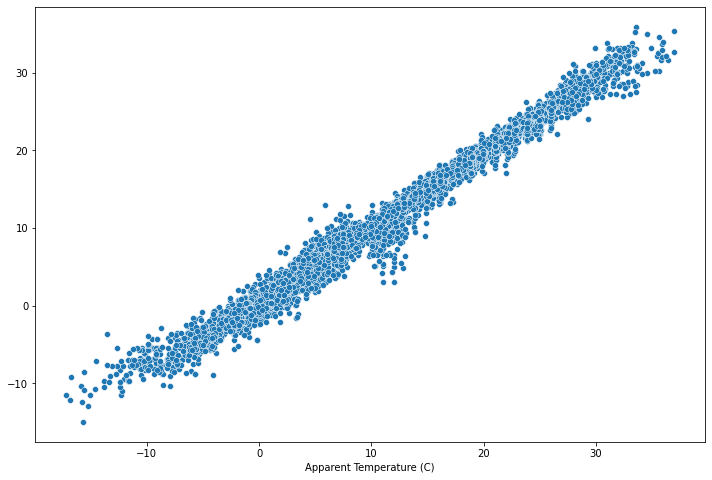

In [47]:
plt.figure(figsize=[12,8])
sns.scatterplot(y_test, predictions)

## When tried to set more one n_neighbors parameter, I found the optimal n_neighbors is 5 that optain less error and high accurecy

###########################################################################################################################

# Apply DecisionTreeRegressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [49]:
predictions = DTR.predict(X_test)
n=np.size(predictions)
print(n)

8784


In [50]:
# Storing Targets and predictions to compare values
compare_df = pd.DataFrame({
    "Target" : y_test,
    "Prediction" : predictions
})

In [51]:
compare_df.sample(10)

,Target,Prediction
94177,6.533333,6.472222
91452,18.988889,18.988889
96419,28.938889,28.944444
93786,12.872222,12.872222
87826,17.844444,17.844444
90795,-10.466667,-10.527778
94838,1.438889,1.416667
95581,11.755556,11.755556
91969,16.627778,16.627778
92414,32.427778,31.588889


In [52]:
# Importing Metrics
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"The RMSE of our model is {rmse:.9f}")

The RMSE of our model is 0.068527390


In [54]:
# R2 Score
print(f"The r2 score of our model is {r2_score(y_test, predictions)} %")

The r2 score of our model is 0.9999551440284055 %


C:\Users\FreeComp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Apparent Temperature (C)'>

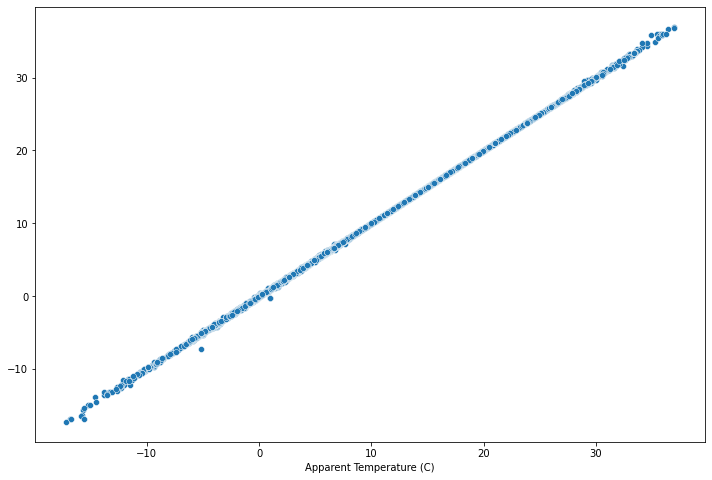

In [55]:
plt.figure(figsize=[12,8])
sns.scatterplot(y_test, predictions)

###########################################################################################################################

# Apply RandomForestRegressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [57]:
predictions = RFR.predict(X_test)
n=np.size(predictions)
print(n)

8784


In [58]:
# Storing Targets and predictions to compare values
compare_df = pd.DataFrame({
    "Target" : y_test,
    "Prediction" : predictions
})

In [59]:
compare_df.sample(10)

,Target,Prediction
95879,15.527778,15.527667
91295,-3.577778,-3.568667
87895,21.877778,21.877667
87676,12.366667,12.366722
89150,1.872222,1.882056
87901,22.677778,22.677778
87717,7.672222,7.650333
91312,0.383333,0.371667
88022,21.288889,21.288833
88112,11.016667,11.016667


In [60]:
# Importing Metrics
from sklearn.metrics import mean_squared_error, r2_score
#RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"The RMSE of our model is {rmse:.9f}")

The RMSE of our model is 0.037138162


In [61]:
# R2 Score
print(f"The r2 score of our model is {r2_score(y_test, predictions)} %")

The r2 score of our model is 0.9999868255434866 %


C:\Users\FreeComp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Apparent Temperature (C)'>

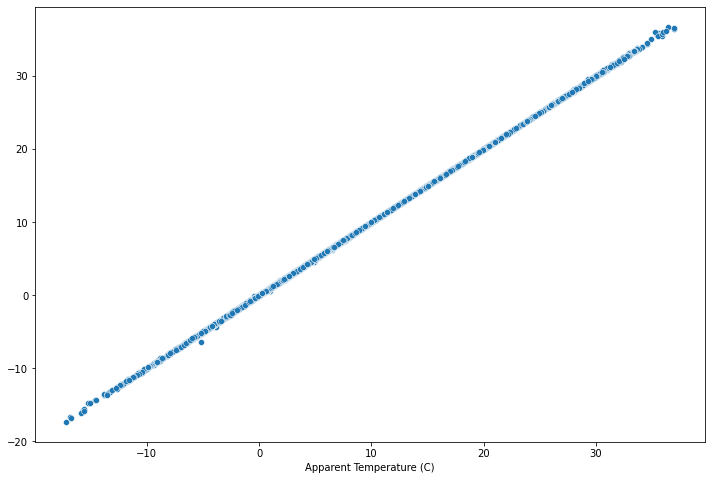

In [62]:
plt.figure(figsize=[12,8])
sns.scatterplot(y_test, predictions)

## By using different Regression Technique and calculate the Mean squar error to evaluate the error presentage in each model, I found the best and the lowest error in RandomForestRegressor Algorithm and  DecisionTreeRegressor as shown above but the RandomForestRegressor took long time to fit model 

## I tried to use SVR Regression but this Algorithm took too long time to fit model